In [61]:
import numpy as np
import pandas as pd

In [2]:
# dataset from Chapter 3 of An Introduction to Statistical Learning ()
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [6]:
# check the shape of the dataframe (rows, columns)
data.shape
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
import seaborn as sns

%matplotlib inline

/Users/g4brielvs/.pyenv/versions/3.7.0/envs/or/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


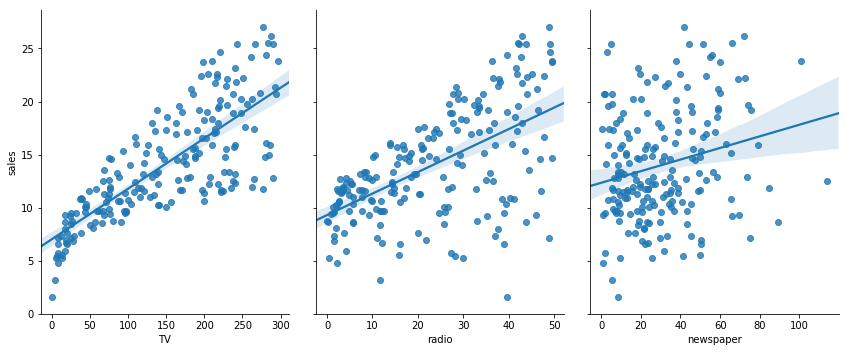

In [11]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars=['sales'], height=5, aspect=0.8, kind='reg')

In [38]:
# create a list of feature names
feature_cols = ['TV','radio','newspaper']

# select a subset of the original dataframe
X = data[feature_cols]

# create a list of response
response_cols = ['sales']

# select a subset of the original dataframe
y = data[response_cols]

In [19]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [26]:
# default split is 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training dataset
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[2.79946036]
[[0.04688543 0.18260704 0.00184359]]


# **Model evaluation metrics for regression**

Evalution matrics for classification problems, such as **accuracy**, are not useful for regression.

Let's create some example numeric predictions, and calculate **three common evalution metrics** for regression.

In [46]:
#define numerical examples
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:    

$$\frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i| $$

In [60]:
# calculate MAE using scikit-learn
from sklearn import metrics
print metrics.median_absolute_error(true, pred)

10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:    

$$\frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y}_i)^2 $$

In [61]:
# calculate MSE using scikit-learn
print metrics.mean_squared_error(true, pred)

150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:    

$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y}_i)^2}$$

In [68]:
# calculate RMSE using scikit-learn
import numpy as np
print np.sqrt(metrics.mean_squared_error(true, pred))

12.2474487139


 **Comparing these metrics:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

 **RMSE for our sales predictions:**

In [73]:
# make predictions on the testing subset
y_pred = linreg.predict(X_test)

# RMSE
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.56799801941


# **Feature Selection**

In [84]:
# select first two features
feature_cols = ['TV', 'Radio']

# select subset
X = data[feature_cols]

#y = data.Sales
y = data[response_cols]

# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model
linreg.fit(X_train, y_train)

# make predictions
y_pred = linreg.predict(X_test)

# compute RMSE
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.38790346994
